# Customer Segmentation Using K-Means Clustering
### Implementasi Latihan  Machine Learning 

Project ini bertujuan melakukan segmentasi pelanggan menggunakan algoritma **K-Means Clustering**.  
Dataset berisi 6 fitur utama perilaku pelanggan:

- Age  
- Income  
- App Time  
- Web Time  
- Purchase Count  
- Spending Score  

Tahapan analisis:
1. Exploratory data analysis  
2. Preprocessing data  
3. Penentuan jumlah cluster optimal  
4. Penerapan K-Means  
5. Visualisasi PCA  
6. Profiling tiap cluster  
7. Insight bisnis  



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


## 📥 Load Dataset
Dataset yang digunakan merupakan data simulasi pelanggan e-commerce berdasarkan instruksi matakuliah sebagai latihan project

In [12]:
df = pd.read_csv("../dataset/ecommerce_customers.csv")
df.head()


,Age,Income,App Time,Web Time,Purchase Count,Spending Score
0,56,8971,109.33,82.25,29,82
1,46,7625,163.20,69.93,22,86
2,32,4950,17.73,146.80,4,40
3,25,9992,57.76,61.17,20,84
4,38,14323,171.57,94.99,32,77


## 📊 Exploratory Data Analysis
Melihat informasi data & statistik awal.


In [13]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             350 non-null    int64  
 1   Income          350 non-null    int64  
 2   App Time        350 non-null    float64
 3   Web Time        350 non-null    float64
 4   Purchase Count  350 non-null    int64  
 5   Spending Score  350 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 16.5 KB


,Age,Income,App Time,Web Time,Purchase Count,Spending Score
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,39.488571,8606.737143,94.541429,82.996886,19.954286,52.968571
std,12.352216,3632.130895,48.799501,45.821039,11.149578,26.223562
min,18.000000,2004.000000,10.790000,5.990000,1.000000,10.000000
25%,29.000000,5645.000000,51.367500,41.135000,11.000000,30.000000
50%,41.000000,8615.500000,93.705000,85.855000,20.000000,51.000000
75%,50.000000,11802.750000,137.085000,123.772500,29.000000,77.000000
max,59.000000,14991.000000,179.950000,159.680000,39.000000,99.000000


## 🧹 Preprocessing Data
Melakukan scaling pada 6 fitur utama agar memiliki skala yang sama.


In [14]:
# Scalling data
features = ["Age", "Income", "App Time", "Web Time", "Purchase Count", "Spending Score"]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 📉 Menentukan Jumlah Cluster Optimal — Elbow Method


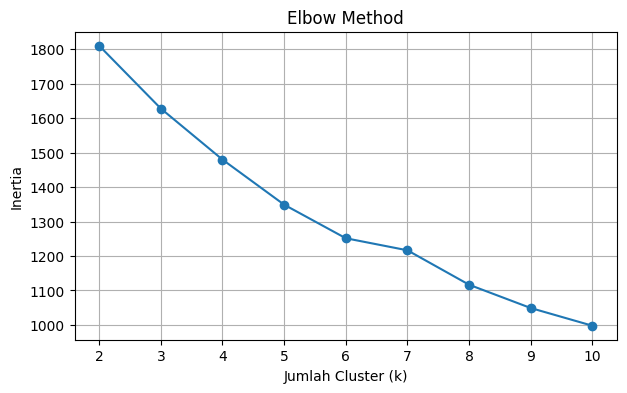

In [15]:
# ELBOW 
inertia = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()


## 🧩 Silhouette Score
Mengukur kualitas cluster untuk setiap nilai k.


In [17]:
# Silhouette

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={score}")



k=2, Silhouette Score=0.13235072728394662
k=3, Silhouette Score=0.12390435354159779
k=4, Silhouette Score=0.13010919582997799
k=5, Silhouette Score=0.13522980795429373
k=6, Silhouette Score=0.14553685250356413
k=7, Silhouette Score=0.13315039149793234
k=8, Silhouette Score=0.14561893125680792
k=9, Silhouette Score=0.1558397508683933
k=10, Silhouette Score=0.16104043899838633


In [ ]:
## 🚀 Model Training
Menggunakan jumlah cluster optimal dari hasil analisis (misal k=4).


In [18]:
# K-Means Training
k_optimal = 4  # ganti sesuai hasil elbow & silhouette kamu
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

df.head()


,Age,Income,App Time,Web Time,Purchase Count,Spending Score,Cluster
0,56,8971,109.33,82.25,29,82,3
1,46,7625,163.20,69.93,22,86,3
2,32,4950,17.73,146.80,4,40,1
3,25,9992,57.76,61.17,20,84,2
4,38,14323,171.57,94.99,32,77,3


## 🎨 Visualisasi Cluster (PCA 2D)
Mengurangi dimensi data menjadi 2 komponen untuk visualisasi.


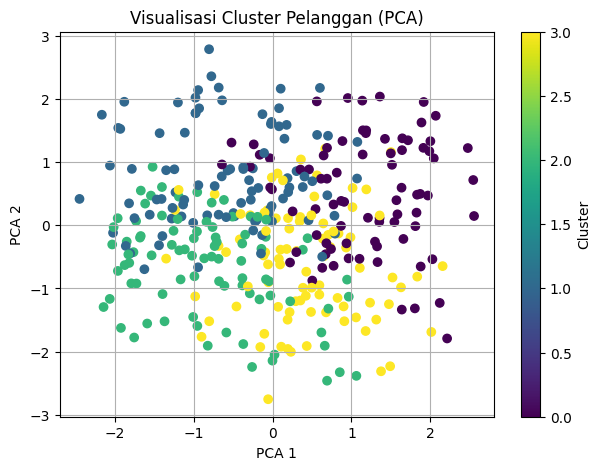

In [19]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

df["PCA1"] = pca_data[:,0]
df["PCA2"] = pca_data[:,1]

plt.figure(figsize=(7,5))
plt.scatter(df["PCA1"], df["PCA2"], c=df["Cluster"], cmap="viridis")
plt.title("Visualisasi Cluster Pelanggan (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()


## 📌 Cluster Profiling
Melihat karakteristik tiap cluster berdasarkan nilai rata-rata fitur.


In [20]:
cluster_profile = df.groupby("Cluster")[features].mean()
cluster_profile


,Age,Income,App Time,Web Time,Purchase Count,Spending Score
Cluster,,,,,,
0,45.462500,8224.112500,145.598750,95.918750,13.175000,37.162500
1,39.138298,9058.585106,55.298723,127.946489,22.223404,49.138298
2,26.390805,9091.586207,81.681724,47.983218,20.183908,50.540230
3,47.292135,7999.483146,102.665281,58.133708,23.426966,73.595506


Insight Bisnis

## 💡 Business Insights

### Cluster 0 – Active Browsers with Low Spending
- Sering melihat produk
- Spending rendah  
→ Tingkatkan konversi dengan voucher/promo

### Cluster 1 – Budget Users
- Income rendah
- Aktivitas moderate  
→ Beri promo harga & diskon member baru

### Cluster 2 – High Spenders
- Spending & Purchase tertinggi  
→ Beri loyalty program / premium membership

### Cluster 3 – Premium Efficient Users
- Income tinggi
- Web Time rendah, belanja efisien  
→ Target iklan produk-produk premium

## 📘 Kesimpulan
Algoritma K-Means berhasil mengelompokkan pelanggan menjadi beberapa segmen yang dapat digunakan untuk:

✔ Strategi pemasaran  
✔ Personalisasi promosi  
✔ Identifikasi pelanggan bernilai tinggi  
✔ Rekomendasi produk  

Project ini menunjukkan kemampuan dalam preprocessing data, unsupervised learning, visualisasi PCA, dan analisis bisnis berbasis data.



In [21]:
# ===========================================================
# PROJECT: K-Means Customer Segmentation
# AUTHOR: Yoanita Ersyputri
# ===========================================================

# ========== 1. IMPORT LIBRARIES ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import os

# ========== 2. LOAD DATA ==========
print("📥 Loading dataset...")

DATA_PATH = "dataset/ecommerce_customers.csv"
df = pd.read_csv(DATA_PATH)

print("Dataset Loaded!")
print(df.head())

# ========== 3. PREPROCESSING ==========
print("\n🔧 Preprocessing data...")

features = ["Age", "Income", "App Time", "Web Time", "Purchase Count", "Spending Score"]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaling completed!")

# ========== 4. ELBOW METHOD ==========
print("\n📉 Running Elbow Method...")

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K, inertia, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)

# Save image
if not os.path.exists("images"):
    os.makedirs("images")

plt.savefig("images/elbow_method.png")
plt.show()

print("Elbow Method saved at: images/elbow_method.png")

# ========== 5. SILHOUETTE SCORE ==========
print("\n📊 Calculating Silhouette Score...")

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score}")

# ========== 6. TRAIN FINAL MODEL ==========
optimal_k = 4   # sesuai hasil laporan modul
print(f"\n🤖 Training final model with k={optimal_k}...")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("Model trained successfully!")
print(df.head())

# ========== 7. PCA VISUALIZATION ==========
print("\n🎨 Creating PCA visualization...")

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(df["PCA1"], df["PCA2"], c=df["Cluster"], cmap="viridis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Segmentation (PCA Visualization)")
plt.colorbar()

plt.savefig("images/cluster_visualization.png")
plt.show()

print("PCA Visualization saved at: images/cluster_visualization.png")

# ========== 8. CLUSTER PROFILING ==========
print("\n📘 Cluster Profiling...")

cluster_profile = df.groupby("Cluster")[features].mean()
print(cluster_profile)

# Save profiling
cluster_profile.to_csv("cluster_profile.csv")
print("Cluster profiling saved to cluster_profile.csv")

# ========== DONE ==========
print("\n✅ Project completed successfully!")


📥 Loading dataset...


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/ecommerce_customers.csv'